<a href="https://colab.research.google.com/github/Papekyan/GBM-und-XG/blob/main/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import GridSearchCV
import seaborn as sns


In [5]:
df = pd.read_csv('heart_data.csv')



In [6]:
df.head(-3)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0


In [7]:
df['age_years'] = df ['age']/365

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
 14  age_years    70000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 8.0 MB


In [9]:
f = pd.read_csv('heart_data.csv')
cardinalities = df.nunique()
for spalte, anzahl in cardinalities.items():
    print("Kardinalität der Spalte '{spalte}': {anzahl}")

Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}
Kardinalität der Spalte '{spalte}': {anzahl}


In [10]:
df = pd.read_csv('heart_data.csv')
df = pd.get_dummies(df, columns=(['gluc','cholesterol']),  drop_first=False)
df = df.drop(['index','id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            70000 non-null  int64  
 1   gender         70000 non-null  int64  
 2   height         70000 non-null  int64  
 3   weight         70000 non-null  float64
 4   ap_hi          70000 non-null  int64  
 5   ap_lo          70000 non-null  int64  
 6   smoke          70000 non-null  int64  
 7   alco           70000 non-null  int64  
 8   active         70000 non-null  int64  
 9   cardio         70000 non-null  int64  
 10  gluc_1         70000 non-null  bool   
 11  gluc_2         70000 non-null  bool   
 12  gluc_3         70000 non-null  bool   
 13  cholesterol_1  70000 non-null  bool   
 14  cholesterol_2  70000 non-null  bool   
 15  cholesterol_3  70000 non-null  bool   
dtypes: bool(6), float64(1), int64(9)
memory usage: 5.7 MB


In [11]:
df.rename(columns={
    'gluc_1': 'gluc_low',
    'gluc_2': 'gluc_med',
    'gluc_3': 'gluc_high',
    'cholesterol_1': 'cholesterol_low',
    'cholesterol_2': 'cholesterol_med',
    'cholesterol_3': 'cholesterol_high'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               70000 non-null  int64  
 1   gender            70000 non-null  int64  
 2   height            70000 non-null  int64  
 3   weight            70000 non-null  float64
 4   ap_hi             70000 non-null  int64  
 5   ap_lo             70000 non-null  int64  
 6   smoke             70000 non-null  int64  
 7   alco              70000 non-null  int64  
 8   active            70000 non-null  int64  
 9   cardio            70000 non-null  int64  
 10  gluc_low          70000 non-null  bool   
 11  gluc_med          70000 non-null  bool   
 12  gluc_high         70000 non-null  bool   
 13  cholesterol_low   70000 non-null  bool   
 14  cholesterol_med   70000 non-null  bool   
 15  cholesterol_high  70000 non-null  bool   
dtypes: bool(6), float64(1), int64(9)
memory 

In [12]:
X = df.drop('cardio',axis=1)
Y = df['cardio']
Y.value_counts()


,count
cardio,
0,35021
1,34979


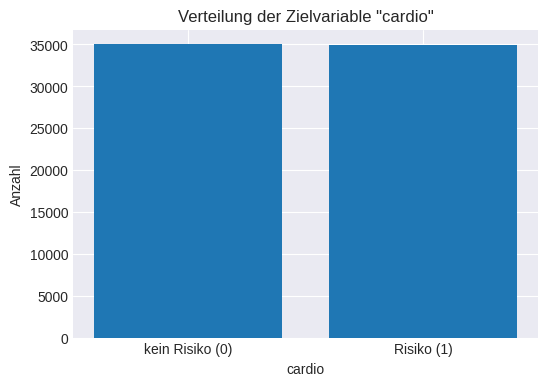

In [13]:
plt.style.use('seaborn-v0_8-darkgrid')
counts = df['cardio'].value_counts().sort_index()

# Balkendiagramm erstellen
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('cardio')
plt.ylabel('Anzahl')
plt.title('Verteilung der Zielvariable "cardio"')
plt.xticks([0, 1], ['kein Risiko (0)', 'Risiko (1)'])
plt.show()


In [14]:
X.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
smoke,0
alco,0
active,0
gluc_low,0


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
gbr = GradientBoostingClassifier(verbose=1)
model = gbr.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3381            5.90s
         2           1.2989            5.42s
         3           1.2666            5.19s
         4           1.2399            5.05s
         5           1.2175            4.96s
         6           1.1989            4.90s
         7           1.1833            4.92s
         8           1.1699            4.87s
         9           1.1589            4.80s
        10           1.1494            4.72s
        20           1.1036            4.15s
        30           1.0892            3.61s
        40           1.0824            3.09s
        50           1.0785            2.57s
        60           1.0758            2.04s
        70           1.0739            1.53s
        80           1.0725            1.03s
        90           1.0712            0.54s
       100           1.0701            0.00s


In [17]:
Y_pred = model.predict(X_test)
import pickle
pickle.dump(model, open("gbr.pickle.dat", "wb"))

In [18]:
prec = precision_score(Y_test, Y_pred)
rec  = recall_score(Y_test, Y_pred)
print(prec, rec)

0.752725620835857 0.7089275527666857


In [19]:
report = classification_report(
    Y_test,
    Y_pred,
    labels=[1, 0],
    target_names=["Cardio (1)", "Non-Cardio (0)"],
    digits=4
)

print("Classification Report:\n")
print(report)

cm = confusion_matrix(Y_test, Y_pred, labels=[1, 0])
print(cm)

Classification Report:

                precision    recall  f1-score   support

    Cardio (1)     0.7527    0.7089    0.7302      7012
Non-Cardio (0)     0.7240    0.7663    0.7446      6988

      accuracy                         0.7376     14000
     macro avg     0.7384    0.7376    0.7374     14000
  weighted avg     0.7384    0.7376    0.7374     14000

[[4971 2041]
 [1633 5355]]


In [20]:
param_grid = {
    'max_depth': [1,3,5],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'n_estimators': [10, 50, 100, 150, 200, 300, 400, 500],}

In [ ]:
tuned_model = GridSearchCV(gbr, param_grid, cv=5)
tuned_model.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3826            0.19s
         2           1.3790            0.15s
         3           1.3754            0.13s
         4           1.3720            0.11s
         5           1.3686            0.09s
         6           1.3652            0.07s
         7           1.3620            0.06s
         8           1.3587            0.04s
         9           1.3556            0.02s
        10           1.3525            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3826            0.14s
         2           1.3789            0.13s
         3           1.3754            0.11s
         4           1.3719            0.09s
         5           1.3684            0.08s
         6           1.3651            0.06s
         7           1.3618            0.05s
         8           1.3585            0.03s
         9           1.3554            0.02s
        10           1.3522            0.00s
      It

In [21]:
tuned_model.best_params_
tuned_model.best_score_
tuned_model = tuned_model.best_estimator_

NameError: name 'tuned_model' is not defined

In [ ]:
Y.tuned_pred = tuned_model.predict(X_test)

In [ ]:
report = classification_report(
    Y_test,
    Y_pred,
    labels=[1, 0],
    target_names=["Cardio (1)", "Non-Cardio (0)"],
    digits=4
)

print("Classification Report:\n")
print(report)

cm = confusion_matrix(Y_test, Y.tuned_pred, labels=[1, 0])
print(cm)